# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({"Age": age, "Times Late":tardies})
student_data

,Age,Times Late
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

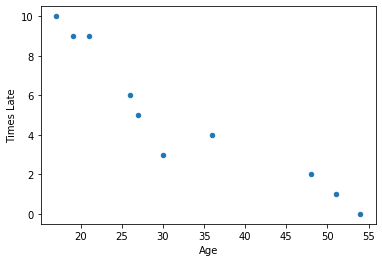

In [3]:
student_data.plot(x = "Age", y= "Times Late",kind="scatter")


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# The younger the student, more likely he/she is to be late to class. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
correlation = np.corrcoef(student_data["Age"], student_data["Times Late"])
print("Correlation: ",correlation)
#covariance:
covariance = np.cov(student_data["Age"], student_data["Times Late"])
print("Covariance: ", covariance)

Correlation:  [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
Covariance:  [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


In [6]:
# There is a high correlation between age and lateness (0.93) and this
# relationship is negative (has a negative co variance), meaning that
# the younger the students the more likely they are to be late. A positive covariance
# would mean the opposite, the older the student the more likely he/she would
# be late.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
X = student_data['Age']
Y = student_data['Times Late']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y) 
slope

-0.2428207709159808

Plot your regression model on your scatter plot.

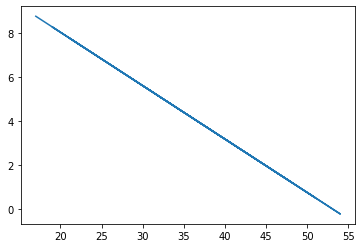

In [8]:
Y_pred = intercept + slope * X
res = Y - Y_pred
plt.plot(X, Y_pred)

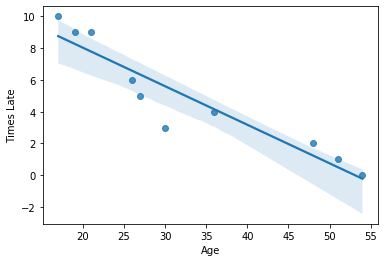

In [9]:
#another way of looking at it with seaborn
sns.regplot(x="Age", y="Times Late", data = student_data)

In [10]:
# I chose to look at the slope because here we are only comparing
# one variable against the other. If we were comparing more, then
# it would be necessary to use multiple regression.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Age is a good predictor of tardiness.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
vehicles = pd.read_csv("/Users/ana/ironhack_coding/datasets/vehicles.csv")


In [13]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
#choose only relevant columns for correlation matrix
vehicles2 = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
vehicles2.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [15]:
#correlation matrix between all the relevant variables
vehicles2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
Y = vehicles2["CO2 Emission Grams/Mile"]## Because we are comparing the other variables to the emission of Co2
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]## The other variables who might affect Co2 emissions
lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X) 

Intercept:  769.888283646565
Coef:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [17]:
# Fuel Barrels / Year has the highest effect on CO2
# Cylinders has also some effect on C02 emissions (??)


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [18]:
party_attendants = pd.DataFrame({"invitees": [1,3,4,6,8,9,11,14], "attendants":[1,2,4,4,5,7,8,13]})
party_attendants


,invitees,attendants
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

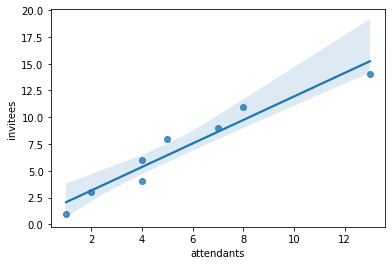

In [19]:
sns.regplot(x="attendants", y = "invitees", data = party_attendants)




What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [20]:
# There is some positive relationship between number of invitees and
# number of attendants. However, this relationship is only positive
# when the number of invitees is under 10.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

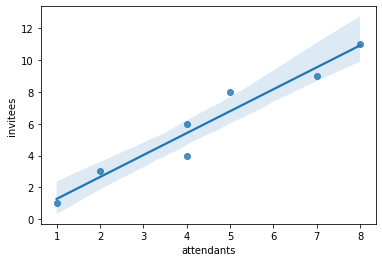

In [21]:
#Have tried to remove outliers using the instructions from these websites:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# https://kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
# None of these options removed the datapoint 13. Is this a real outlier?

# I will remove it manually.

party_attendants = party_attendants[:-1]
sns.regplot(x="attendants", y = "invitees", data = party_attendants)




What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
# the x and y axis range has changed because the number of max attendees/invitees 
# has also changed, however the line looks the same.
